#**1 Introducción**

En el siguiente cuarderno se realizará la aplicacion del filtro Box Blur pero está vez utilizando los módulo que contiene PIL[1] de Python y hacer una comparación con el algoritmo de Box Blur realizado en el cuaderno 1 (Versión GPU) para describir cual de los dos es más eficiente.

#**2 Armado del ambiente**
Toma la dirección web de una imagen con acceso público en internet, la deja disponible al contexto de ejecuciòn del cuaderno colab.

In [17]:
#@title # 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://github.com/jonyfernandez/TP2-SOA-Android/blob/master/HPC/flores2560x1600.jpg?raw=true" #@param {type:"string"}

#@markdown ---
# Leo la imagen desde internet.
#!wget https://github.com/jonyfernandez/TP2-SOA-Android/blob/master/HPC/unlam.jpg?raw=true -O imagen.jpg

# Verificamos que haya escrito una URL valida
if not (type(url_imagen) is str) or (url_imagen == ""):
  raise TypeError("Se tiene que ingresar una URL valida")

# Guardamos la imagen
!wget {url_imagen} -O imagen.jpg

--2021-07-12 20:07:16--  https://github.com/jonyfernandez/TP2-SOA-Android/blob/master/HPC/flores2560x1600.jpg?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jonyfernandez/TP2-SOA-Android/raw/master/HPC/flores2560x1600.jpg [following]
--2021-07-12 20:07:17--  https://github.com/jonyfernandez/TP2-SOA-Android/raw/master/HPC/flores2560x1600.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonyfernandez/TP2-SOA-Android/master/HPC/flores2560x1600.jpg [following]
--2021-07-12 20:07:17--  https://raw.githubusercontent.com/jonyfernandez/TP2-SOA-Android/master/HPC/flores2560x1600.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com 

##2.2 Instala en el cuaderno el módulo de CUDA de Python

In [3]:
!pip install pycuda

     |████████████████████████████████| 1.7MB 12.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627659 sha256=8b9e2077e9da167e512b674b70fc683d19043c967e49bff17005fa855e6769bf
  Stored in directory: /root/.cache/pip/wheels/d5/55/64/fd4dddcc5f1c25eebd90b5291c3769101dc978c70165685512
Successfully built pycuda
  Created wheel for pytools: filename=pytools-2021.2.7-py2.py3-none-any.whl size=60644 sha256=2e0674c6c919dc6e3ddef27653eebd99fd854e9bae502f9ae93627686d4d792e
  Stored in directory: /root/.cache/pip/wheels/a0/b5/e5/e65d25997fd77729b9aa214645add18688483e48bbcbab6ffc
Successfully built pytools


#**3 Desarrollo**

Detalles: RGB- [2560, 1600]
Tiempo de conversión de imagen: 72.261 [ms]
Tiempo Total: 276.29 [ms]


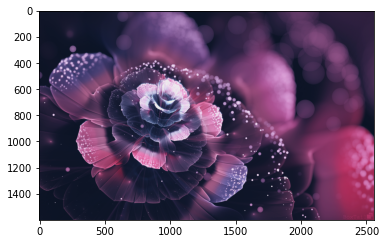

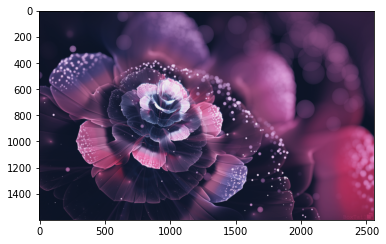

In [34]:
%matplotlib inline
from datetime import datetime

tiempo_total = datetime.now()

import matplotlib.pyplot as plt
import numpy
from PIL import Image, ImageFilter

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

try:
  img_nombre = 'imagen.jpg'
  im1 = Image.open(img_nombre)
except:
  raise Exception("No se pudo abrir la imagen")

# Optengo las proporsiones de la imagen.
img_ancho, img_alto = im1.size

#Muestro la imagen original antes de aplicar el filtro.
plt.figure()
imgplot=plt.imshow( im1 )

#Tiempo para el aplicado del filtro.
tiempo_img = datetime.now()

#recibe un paramatro que es el radio. 0 no se difumina
#1, toma solo un pixel en cada direccion y guarda el promedio
#en este caso son 9 pixeles como lo hecho en el cuaderno 1
im2 = im1.filter(ImageFilter.BoxBlur(1))

# end time
tiempo_img = datetime.now() - tiempo_img

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot=plt.imshow( im2 )

tiempo_total = datetime.now() - tiempo_total

# Muestro los atributos de las imagenes
print("Detalles: " + im1.mode + "- [" + str(img_ancho) + ", " + str(img_alto) + "]" )

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )

#**4 Metricas**
En el siguiente cuando vamos hacer una comparativa de los tiempos usando la funcion BoxBlur del Módulo PIL y la resolucion hecha en GPU.

Dimensiones | Tiempo procesamiento imagen Función | Tiempo Total Función | Tiempo procesamiento imagen GPU | Tiempo Total GPU
------------|---------|----------|---------|--------
728x455|16.008 ms|34.225 ms|0.332 ms|57.252 ms
1024x768|25.864 ms|51.613 ms|0.351 ms|75.364 ms
1920x1080|84.798 ms|189.671 ms|0.365 ms|159.64 ms
2560x1600|74.346 ms|279.593 ms|0.349 ms|309.727 ms

#**5 Conclusiones**

Al observar los tiempos obtenidos tomando solamente un pixel en cada direcciones que es como se realizó en la forma paralela GPU podemos decir que ambas resoluciones tienen un tiempo total muy semenjantes concluyendo que ambas son muy eficientes, pero si queremos aplicar el filtro tomando de a 2 o mas pixeles en todas sus direcciones es mejor usar la función que brinda el propio módulo ya que la hecha en GPU solo toma 1 pixel en todas sus direcciones.


#**6 Bibliografía**
[1] Módulo PIL: [WEB](https://www.geeksforgeeks.org/python-pil-boxblur-method/)